In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv(r'C:\Users\dell\Desktop\python specialclass\MLproject-weekends\MoneyLaundering\Money Laundering.csv (1).csv')

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

**Chances of Money Laundering:**
(a)	If many originators are engaging in diverse transaction types with a single beneficiary, there's a likelihood that the beneficiary's account is a mule account or is connected to money laundering activities. Also another red flag is when distinct applicants transferrign to particular beneficiary.
(b)	If the amount of cash transaction happening is pretty high then there is chance of money laundering.
(c)	If total number of transactions occuring in a particular account is high, then there is chance of money laundering

(i) Step: Maps a unit of time in the real world. In this case 1 step is 1 hour of time.
(ii) Type: Indicates the type of transaction being performed.
(iii) Amount: Indicates the amount of money being transacted.
(iv) nameOrg: It indicates the name of the sender from where the transaction is being initiated.
(v) oldbalanceOrg: It indicates the balance of the sender of the amount before transaction.
(vi) nameDest: It indicates the name of the receiver of the amount that is being transferred.
(vii) oldbalanceDest: It indicates the old balance of the receiver before receiving the amount that is transferred.
(viii) newbalanceDest: It indicates the new balance of the receiver after receiving the amount being transferred.
(ix) isFraud: It indicates whether a transaction is fraudulent or not. If the outcome is 1 it means that the transaction is fraudulent and if the outcome is 0 is means that the transaction is not fraudulent.
(x) isFlaggedFraud: It acts as an indicator that there is a potential possibility for a transaction to be a fraudulent one if it holds a value of 1 and otherwise if it holds zero.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
data['nameOrig'].value_counts().count()

6353307

In [10]:
data['nameDest'].value_counts().count()

2722362

In [11]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
print(data['amount'].max())
print(data['amount'].min())

92445516.64
0.0


In [13]:
Moneylaundered=data[data['isFraud'] == 1]
NotMoneyLaundered= data[data['isFraud'] == 0]

In [14]:
print("Total No of Transactions =", len(data['isFraud']))

Total No of Transactions = 6362620


In [15]:
print("Total No of identified Money Laundered Transactions =", len(Moneylaundered))
print("Percentage of identified Money Laundered Transactions =", len(Moneylaundered)/len(data['isFraud'])*100.0, "%")

Total No of identified Money Laundered Transactions = 8213
Percentage of identified Money Laundered Transactions = 0.12908204481801522 %


In [16]:
print("Total No of  NOT  money laundering transactions =", len(NotMoneyLaundered))
print("Percentage of NOT money laundering transactions =", 1.*len(NotMoneyLaundered)/len(data['isFraud'])*100.0, "%")

Total No of  NOT  money laundering transactions = 6354407
Percentage of NOT money laundering transactions = 99.87091795518198 %


In [17]:
print('Null Values=',data.isnull().values.any())

Null Values= False


In [18]:
data=data.drop_duplicates(keep='first').copy()
data.head()
# duplicate rows will be deleted.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
data.isnull().sum().sum()

0

<AxesSubplot:>

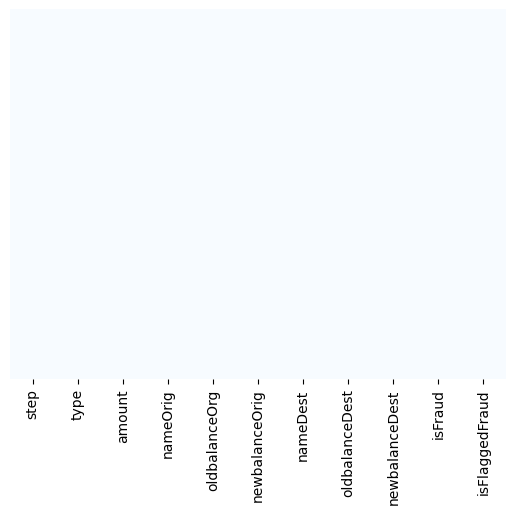

In [20]:
# No missing values here
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [21]:
#Examining whether there is a connection between transaction categories and money laundering transactions
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [22]:
#Generate the scatter plot for fraud

<AxesSubplot:xlabel='type', ylabel='count'>

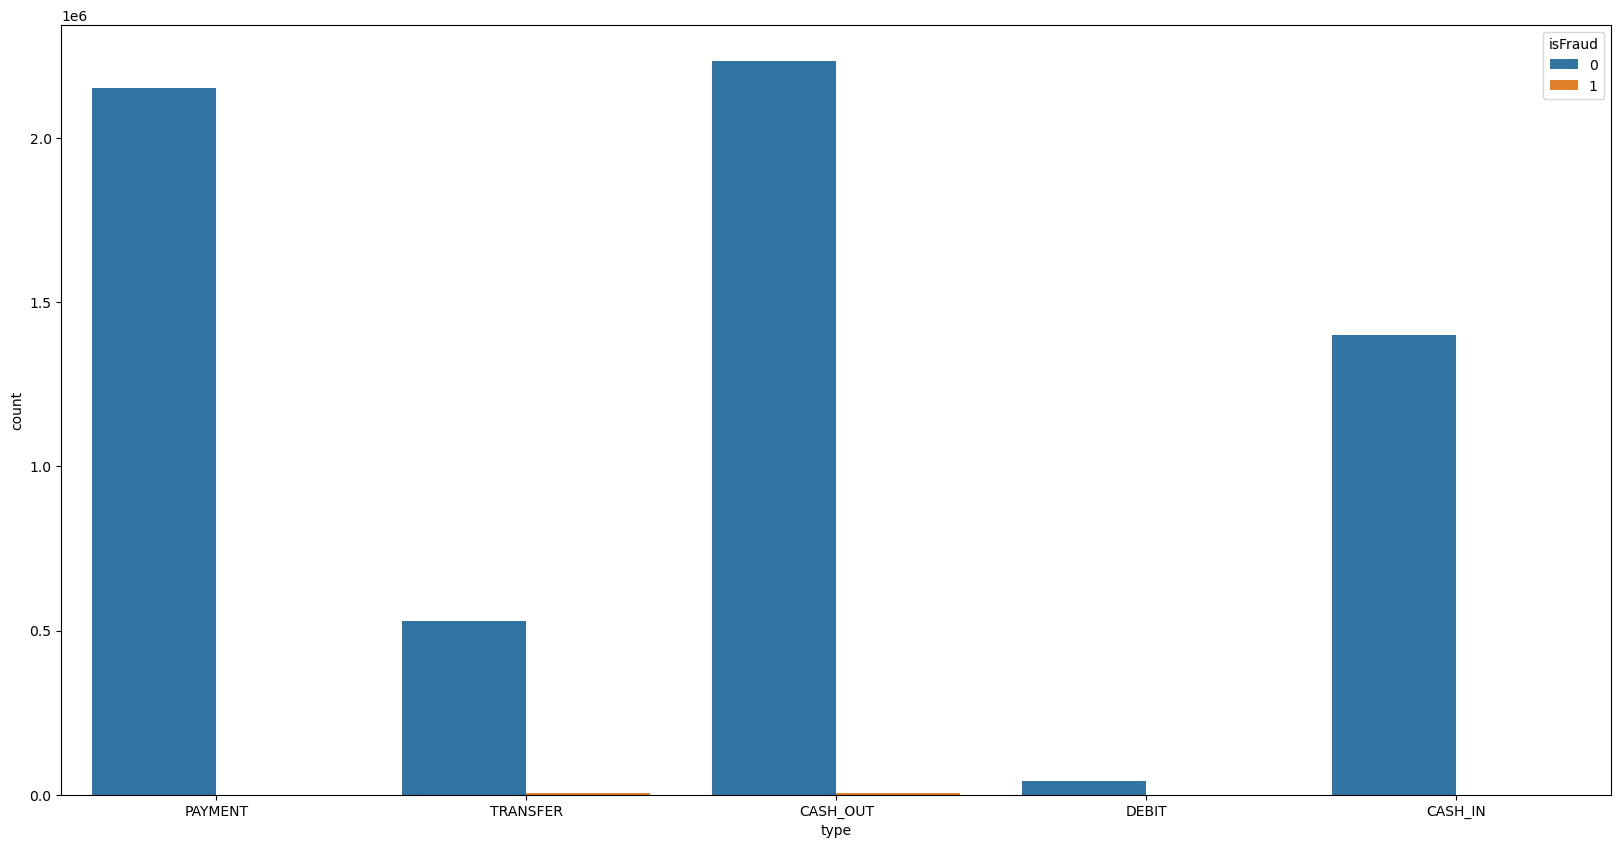

In [23]:
plt.figure(figsize= [20, 10])
sns.countplot(x = 'type', hue = 'isFraud' , data = data)

Text(0.5, 0, 'Money Laundered in comparision to amount')

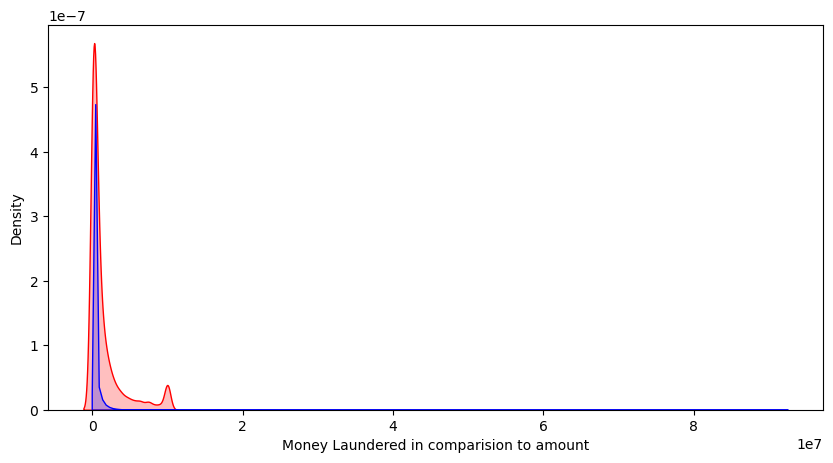

In [24]:
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

Fraud_data =data[data['isFraud'] == 1]
NoFraud_data = data[data['isFraud'] == 0]


plt.figure(figsize=(10,5))

sns.kdeplot(Moneylaundered['amount'], label = 'Money Laundered Transaction', shade = True, color = 'r')
sns.kdeplot(NotMoneyLaundered['amount'], label = 'Not Money Laundered Transaction', shade = True, color = 'b')

plt.xlabel('Money Laundered in comparision to amount')

###Money laundering is happening around 10 lakhs to 15 lakhs amount.

<AxesSubplot:>

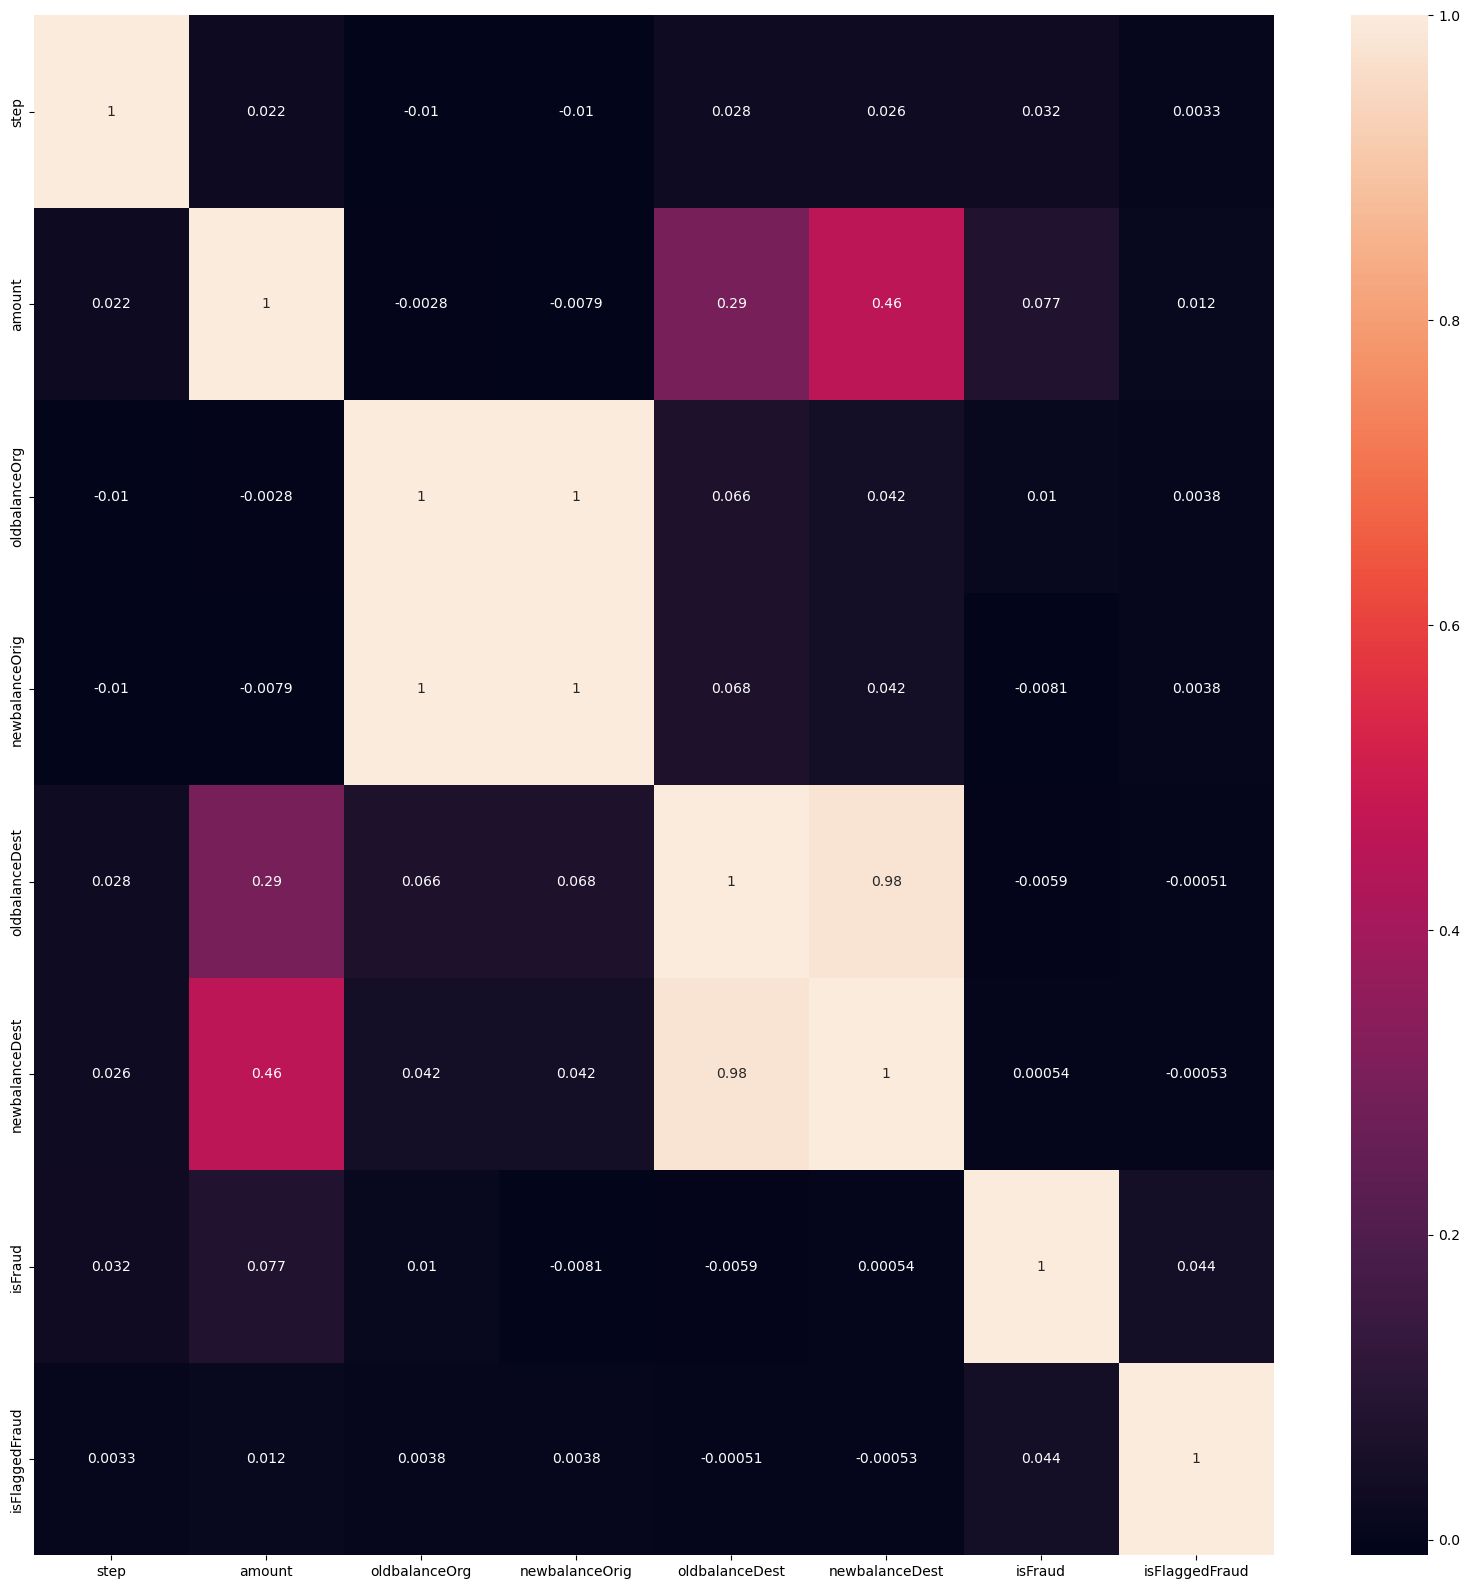

In [25]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [26]:
data.drop('nameOrig',axis=1,inplace=True)
data.drop('nameDest',axis=1,inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data_pd=pd.get_dummies(data['type'])
data_encoded=pd.concat([data,data_pd],axis=1)
data_encoded.drop(['type'],axis=1,inplace=True)

In [27]:
data_encoded.head()

,step,amount,oldbalanceOrg,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,0,0,0,0,1,0


In [28]:
data_encoded['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [29]:
# Applying smote and scaling before train test split leads to data leakage and we can get overoptimistic results.
# So manually balance the dataset so that model gets trained equally on class 1 samples as well as class 0 samples.
# 8213 samples of 1 and 8213 samples of 0, so total rows will be 16426.

In [30]:
class_0=data_encoded[data_encoded['isFraud']==0].sample(n=8213,random_state=111)

In [31]:
class_1=data_encoded[data_encoded['isFraud']==1]

In [32]:
data_balanced=pd.concat([class_0,class_1])

In [33]:
data_balanced=data_balanced.sample(frac=1,random_state=111).reset_index(drop=True)

<AxesSubplot:>

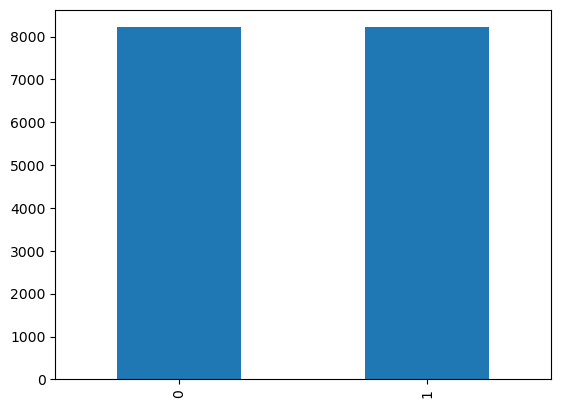

In [34]:
data_balanced.isFraud.value_counts().plot.bar()

In [35]:
print(data_balanced.isFraud.value_counts())

0    8213
1    8213
Name: isFraud, dtype: int64


In [36]:
X=data_balanced.drop(['isFraud'],axis=1)
Y=data_balanced['isFraud']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state=111)

In [38]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (13962, 10)
Number transactions Y_train dataset:  (13962,)
Number transactions X_test dataset:  (2464, 10)
Number transactions Y_test dataset:  (2464,)


In [39]:
X_train.shape

(13962, 10)

In [40]:
X_test.shape

(2464, 10)

In [41]:
#sm=SMOTE(random_state=111,sampling_strategy=1.0)

In [42]:
#X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score,average_precision_score

In [45]:
sc=StandardScaler()

In [46]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg=LogisticRegression()

In [49]:
log_reg.fit(X_train_scaled,Y_train)

LogisticRegression()

In [50]:
preds=log_reg.predict(X_test_scaled)

In [51]:
accuracy=accuracy_score(Y_test,preds)

In [52]:
print(accuracy*100)

88.5146103896104


In [53]:
from sklearn import metrics

In [54]:
rmsle=metrics.mean_squared_log_error(Y_test, preds)
rmsle

0.05518190054336485

In [55]:
print('Classification report', '\n', classification_report(Y_test, preds), '\n')

Classification report 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      1260
           1       0.87      0.90      0.88      1204

    accuracy                           0.89      2464
   macro avg       0.89      0.89      0.89      2464
weighted avg       0.89      0.89      0.89      2464
 



In [56]:
Y_pred_proba=log_reg.predict_proba(X_test_scaled)[:,1]

In [57]:
average_precision=average_precision_score(Y_test,Y_pred_proba)

In [58]:
print(average_precision)

0.9636536952765219


## **Decision trees**

In [59]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [60]:
decision_tree.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [61]:
preds=decision_tree.predict(X_test_scaled)

In [62]:
accuracy=accuracy_score(Y_test,preds)

In [63]:
print(accuracy*100)

98.13311688311688


In [64]:
rmsle=metrics.mean_squared_log_error(Y_test, preds)
rmsle

0.008969496201394993

In [65]:
print('Classification report', '\n', classification_report(Y_test, preds), '\n')

Classification report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1260
           1       0.98      0.98      0.98      1204

    accuracy                           0.98      2464
   macro avg       0.98      0.98      0.98      2464
weighted avg       0.98      0.98      0.98      2464
 



In [66]:
Y_pred_proba=decision_tree.predict_proba(X_test_scaled)[:,1]

In [67]:
average_precision=average_precision_score(Y_test,Y_pred_proba)

In [68]:
print(average_precision)

0.9711192790201815


## **RANDOM FOREST CLASSIFIER**

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
random_forest = RandomForestClassifier()

In [71]:
random_forest.fit(X_train_scaled,Y_train)

RandomForestClassifier()

In [72]:
preds=random_forest.predict(X_test_scaled)

In [73]:
accuracy=accuracy_score(Y_test,preds)

In [74]:
print(accuracy*100)

98.49837662337663


In [75]:
rmsle=metrics.mean_squared_log_error(Y_test, preds)
rmsle

0.007214594770687277

In [76]:
print('Classification report', '\n', classification_report(Y_test, preds), '\n')

Classification report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1260
           1       0.98      0.99      0.98      1204

    accuracy                           0.98      2464
   macro avg       0.98      0.99      0.98      2464
weighted avg       0.99      0.98      0.98      2464
 



In [77]:
# If there had been a significant loss of important information during the balancing process, it would likely have negatively 
# impacted the model's performance. We would have seen lower accuracy, precision, recall, F1-scores, or possibly even instability 
# in the model's predictions.